# Python Project for Data Science

## Project Overview

For this project, you will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. Your job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

## Import Libraries

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
apple = yf.Ticker('AAPL')

## Apple

### Stock Info

In [3]:
apple_info = apple.info

In [4]:
apple_info['country']

'United States'

### Extracting Share Price

In [5]:
apple_share_price_data = apple.history(period = 'max')

In [6]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600,0.0,0.0
1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800,0.0,0.0
1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000,0.0,0.0
1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600,0.0,0.0
1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600,0.0,0.0


In [7]:
apple_share_price_data.reset_index(inplace = True)

<AxesSubplot:xlabel='Date'>

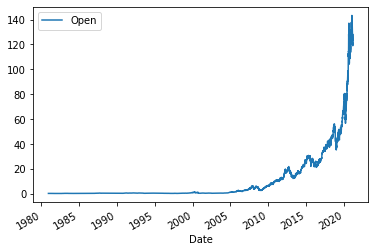

In [8]:
apple_share_price_data.plot(x = 'Date', y = 'Open')

### Extracting Dividends
Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns.

In [9]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-02-07    0.192500
2020-05-08    0.205000
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
Name: Dividends, Length: 70, dtype: float64

<AxesSubplot:xlabel='Date'>

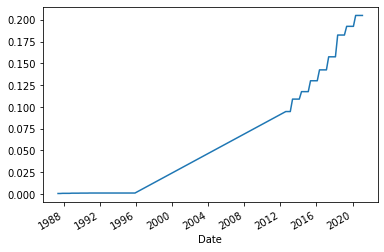

In [10]:
apple.dividends.plot()

## Exercise - AMD(Advanced Micro Devices)

In [11]:
amd = yf.Ticker('amd')

**Question 1** Use the key 'country' to find the country the stock belongs to, remember it as it will be a quiz question.

In [12]:
amd.info['country']

'United States'

**Question 2** Use the key 'sector' to find the sector the stock belongs to, remember it as it will be a quiz question.

In [13]:
amd.info['sector']

'Technology'

**Question 3** Find the max of the Volume column of AMD using the history function, set the period to max.

In [14]:
amd_history = amd.history(period = 'max')
amd_history[amd_history['Volume'] == amd_history['Volume'].max()]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-08-27,24.940001,27.299999,24.629999,25.26,325058400,0,0.0


## Extracting Stock Data Using a Web Scraping

## Import Libraries

In [15]:
import requests
from bs4 import BeautifulSoup

In [16]:
url = 'https://finance.yahoo.com/quote/AMZN/history?period1=1451606400&period2=1612137600&interval=1mo&filter=history&frequency=1mo&includeAdjustedClose=true'
html_data  = requests.get(url).text

In [18]:
soup = BeautifulSoup(html_data,"html.parser")

**Question 1** what is the content of the title attribute:

In [19]:
soup.find_all(name = 'title')

[<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>]

In [20]:
soup.title

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

Using beautiful soup extract the table with historical share prices and store it into a dataframe named amazon_data. The dataframe should have columns Date, Open, High, Low, Close, Adj Close, and Volume. Fill in each variable with the correct data from the list col.

In [21]:
data = soup.find('tbody').find_all('tr')

In [22]:
data[0].find_all('td')

[<td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jan 01, 2021</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">3,270.00</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">3,363.89</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">3,086.00</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">3,206.20</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">3,206.20</span></td>,
 <td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">71,529,900</span></td>]

In [23]:
# this would be the date
data[0].find_all('td')[0].text 

'Jan 01, 2021'

In [24]:
# this would be the open
data[0].find_all('td')[1].text 

'3,270.00'

In [25]:
# high
data[0].find_all('td')[2].text 

'3,363.89'

In [26]:
# low
data[0].find_all('td')[3].text 

'3,086.00'

In [27]:
# Close
data[0].find_all('td')[4].text 

'3,206.20'

In [28]:
# adj_close
data[0].find_all('td')[5].text 

'3,206.20'

In [29]:
# volume
data[0].find_all('td')[6].text 

'71,529,900'

In [30]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [31]:
amazon_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jan 01, 2021","3,270.00","3,363.89","3,086.00","3,206.20","71,529,900","3,206.20"
1,"Dec 01, 2020","3,188.50","3,350.65","3,072.82","3,256.93","77,567,800","3,256.93"
2,"Oct 31, 2020","3,061.74","3,366.80","2,950.12","3,168.04","90,810,500","3,168.04"
3,"Sep 30, 2020","3,208.00","3,496.24","3,019.00","3,036.15","116,242,300","3,036.15"
4,"Aug 31, 2020","3,489.58","3,552.25","2,871.00","3,148.73","115,943,500","3,148.73"


**Question 2** What is the name of the columns of the dataframe

In [32]:
amazon_data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

**Question 3** What is the Open of Jun 30, 2019 of the dataframe?

In [33]:
amazon_data['Open'][amazon_data['Date'] == 'Jun 30, 2019']

18    1,922.98
Name: Open, dtype: object